# Метод золотого сечения и квадратичной интерполяции

In [56]:
def calc_f(x):
    return 0.25 * x**4 + x**2 - 8 * x + 12 

In [3]:
import math
import numpy

# Метод золотого сечения

In [10]:
def method_golden(a, b, eps):
    global n
    n = n + 1
    
    if ( abs(a - b) < eps ):
        return (a + b)/2.0
    
    x = a + (1 - 0.68) * abs(a - b)
    x1 = a + 0.68 * abs(a - b)
    if ( calc_f(x) > calc_f(x1)):
        return method_golden(x, b, eps)
    else: 
        return method_golden(a, x1, eps)

In [47]:
def validation(a, b,eps):
    global n
    if (a > b):
        print("Координата конца больше координаты начала? :С")
        exit(0)
    
    print (f'\nИнтервал [{a},{b}], погрешность = {eps}')

    print ("\nОтвет:")

    ans = method_golden(a, b, eps)
    if (ans is None): 
        print("Невозможно расчитать экстремум, возможно, f(x) -- прямая")
        return None
    else: 
        print(f'x = {round(ans, 2)}')
        print(f'f(x) = {round(calc_f(ans), 2)}')
        print(f'количество итераций: {n}')
    return n

# Метод квадратичной интерполяции

In [48]:
def lagrange(f, x1, x2, x3):
    y1 = f(x1)
    y2 = f(x2)
    y3 = f(x3)
    delta = (x2 - x1)*(x3 - x1)*(x3 - x2)
    A = ((x3 - x2)*y1 - (x3 - x1)*y2 + (x2 - x1)*y3) / delta
    B = (-(x3**2 - x2**2)*y1 + (x3**2 - x1**2)*y2 - (x2**2 - x1**2)*y3) / delta
    C = (x2*x3*(x3 - x2)*y1 - x1*x3*(x3 - x1)*y2 + x1*x2*(x2 - x1)*y3) / delta
    xmin = -B / (2*A)
    ymin = -B**2 / (4*A) + C
    return round(xmin, 2), round(ymin, 2)

# Ввод данных

In [57]:
err = True

while (err == True):
    try:
        print ("Введите координату начала:")
        a = float(input())
        print ("Введите координату конца:")
        b = float(input())
        if (a > b):
            print("Координата конца больше координаты начала? :С")
            raise Exception("")
        print ("Введите погрешность:")
        eps = float(input())
        err = False
        n = 0
        if (validation(a, b, eps) is None):
            raise Exception("")
    except Exception:
        print("Ошибка. Проверьте правильность введенных данных\n")
        
print (f'\n\nРезультат для квадратичной интерполяции: {lagrange(calc_f, 0, 1.24, 2)}')

Введите координату начала:
0
Введите координату конца:
2
Введите погрешность:
0.05

Интервал [0.0,2.0], погрешность = 0.05

Ответ:
x = 1.67
f(x) = 3.37
количество итераций: 11


Результат для квадратичной интерполяции: (1.67, 3.66)


# График функции

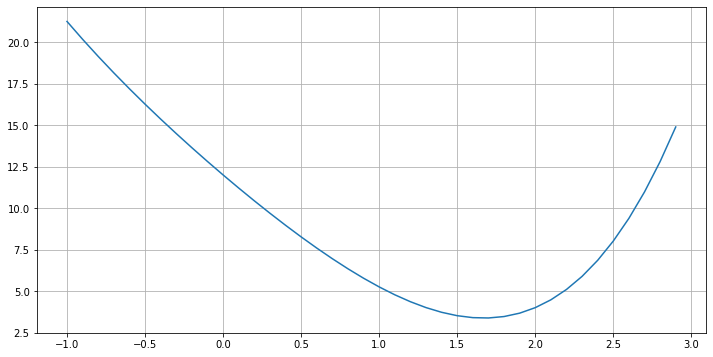

In [19]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

x = np.array(np.arange(-1, 3, step=0.1)) 
y =  calc_f(x)
plt.figure(figsize=(12,6))
plt.plot(x, y) 
plt.grid()
plt.show()